In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [9]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token, pos=None, w=5, h=5):
    
    series = Bucket.token_series(token, pos=pos)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))

    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    zscores = np.array([
        abs(mean-observed)/std
        for mean, std, observed in zip(bs.mean(0), bs.std(0), series)
        if mean > 0
    ])

    print(token, zscores.mean())
    
    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Word count')
    plt.show()

will 10.6880631318


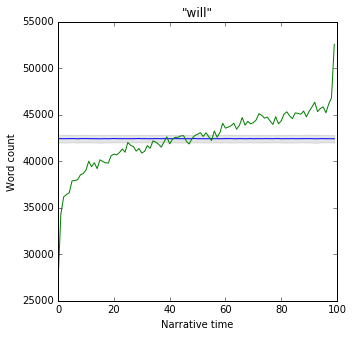

In [12]:
plot_bootstrap('will', 'MD')

In [16]:
def plot_bookends(
    token,
    year1a=1840,
    year1b=1860,
    year2a=1980,
    year2b=2000,
    w=5,
    h=5,
    rel=False,
    coms=False,
    pos=None,
):
    
    s1 = Bucket.token_series(token, year1=year1a, year2=year1b, pos=pos)
    s2 = Bucket.token_series(token, year1=year2a, year2=year2b, pos=pos)
    
    if rel:
        s1 /= s1.sum()
        s2 /= s2.sum()
    
    plt.figure(figsize=(w, h))

    line1, = plt.plot(s1, label='{}-{}'.format(year1a, year1b))
    line2, = plt.plot(s2, label='{}-{}'.format(year2a, year2b))
    
    if coms:

        plt.axvline(
            center_of_mass(s1),
            color=line1.get_color(),
            alpha=0.8,
        )

        plt.axvline(
            center_of_mass(s2),
            color=line2.get_color(),
            alpha=0.8,
        )
        
    plt.legend(
        handles=[line1, line2],
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )

    plt.title('"{}"'.format(token))
    plt.xlabel('Narrative time')
    plt.ylabel('Frequency')
    plt.show()

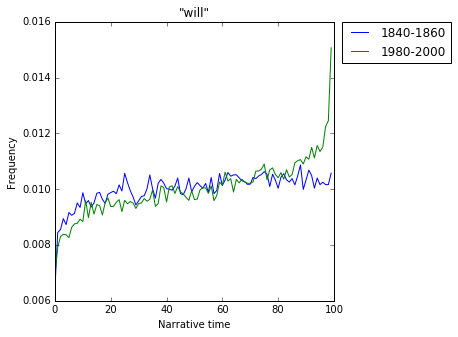

In [17]:
plot_bookends('will', rel=True)

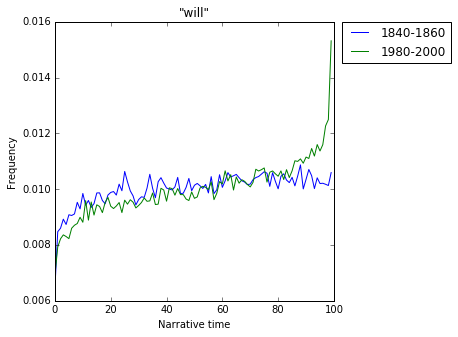

In [18]:
plot_bookends('will', rel=True, pos='MD')